In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import progressbar
import os

In [39]:
nombre_couches = 30
pas_de_temps = 0.01 # s
temps_total = 30 # s

hauteur_beton_sacrificiel = 10 # metres

temperature_initiale_air = 70 + 273 # ° kelvins
masse_aire = 1000 # kg

coefficient_echange_air_corium = 5 # W/(m2.K)

temperature_intiale_beton = temperature_initiale_air
conductivite_beton = 1.9082
temperature_fusion_beton = 1_500 # K
chaleur_latente_beton = 640_000 # J/kg
cp_beton = 1430 # J/kg.K
masse_volumique_beton = 2016 # kg/m3
temperature_frontiere_beton = 70 + 273 # K

temperature_initiale_corium = 273 * 2000
production_chaleur_corium = 30e6

sigma = 5.70e-8 # sigma de la loi de stephan

100% (1000000 of 1000000) |##############| Elapsed Time: 0:00:06 Time:  0:00:06


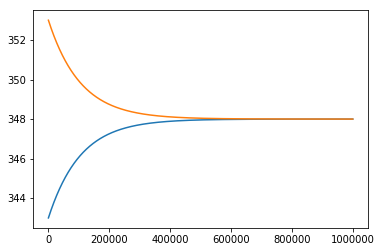

In [44]:
class Element:
    def __init__(self, T0, density, x, cp, energy_production = 0):
        self.T = T0 # temperature
        self.density = density # density
        self.x = x # thickness
        self.cp = cp # thermal capacity
        self.energy_production = energy_production
        
        self.prev_neighboor = None
        self.prev_neighboor_h = 0.0
        
        self.next_neighboor = None
        self.next_neighboor_h = 0.0
        
        self.dT = 0.0
        self.history = []
        
    def calc_next_step(self, dt):
        self.dT = 0
        
        self.dT += self.energy_production * dt
        
        if self.prev_neighboor is not None:
            self.dT += self.prev_neighboor_h * (self.prev_neighboor.T - self.T) * dt # conductivity
            self.dT += sigma * (self.prev_neighboor.T ** 4 - self.T ** 4) * dt      # radiation
        
        if self.next_neighboor is not None:
            self.dT += self.next_neighboor_h * (self.next_neighboor.T - self.T) * dt
            self.dT += sigma * (self.next_neighboor.T ** 4 - self.T ** 4) * dt
        
        mass = self.density * self.x
        self.dT /= (self.cp * mass)
    
    def go_next_state(self):
        self.history.append(self.T)
        self.T += self.dT



